In [76]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
from shapely.ops import transform
import xarray as xr
import numpy as np
import matplotlib as mpl
from scipy.ndimage import binary_dilation as dilate
import scipy as sp
SMALL_SIZE = 20
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
data_path = 'D:\\data\\SEASTAR\\SEASTARSciRec\\Data\\CoSMIZ\\'
ds_coast = xr.open_dataset(data_path + 'SeaSTAR_coastal_mask_20220502.nc')
# ds_ice_N = xr.open_dataset(data_path + 'ice_conc_nh_ease2-250_cdr-v2p0_201409191200.nc')
ds_ice_N = xr.open_dataset(data_path + 'ice_conc_nh_ease2-250_cdr-v2p0_197902271200.nc')
ds_ice_S = xr.open_dataset(data_path + 'ice_conc_sh_ease2-250_cdr-v2p0_201409191200.nc')

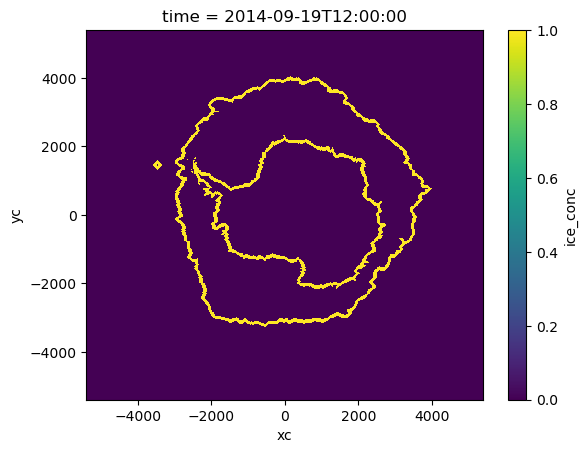

In [67]:
land = xr.where(np.isnan(ds_ice_S.ice_conc),True,False)
# SIB_5_SH = land.where(ds_ice_S.ice_conc>5,0,1)
SIB_5_SH = xr.where(ds_ice_S.ice_conc>5, 1, 0)
SIB_5_SH = xr.where(land, 0, SIB_5_SH)
SIB_5_SH = dilate(SIB_5_SH.isel(time=0).data, iterations=4) - SIB_5_SH.isel(time=0)
# SIB_5_SH = dilate(sp.ndimage.binary_fill_holes(SIB_5_SH.isel(time=0)), iterations=4) - SIB_5_SH.isel(time=0)
SIB_5_SH.plot()
# land, SIB_5_SH = xr.align(land, SIB_5_SH, join='outer')
# SIB_5_SH = xr.where(SIB_5_SH>0, 1, 0)
# xr.where(land, SIB_5_SH, 0).plot()
# plt.show()



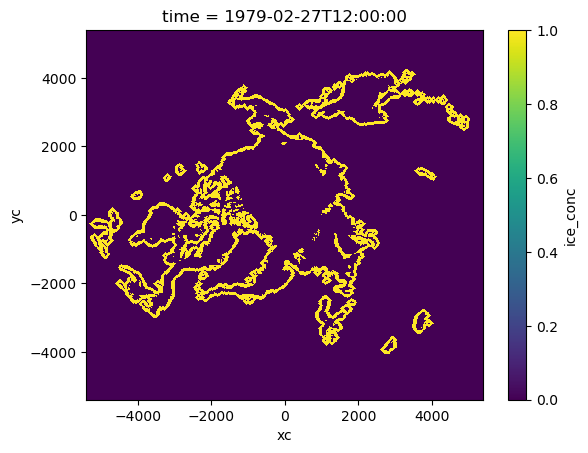

In [68]:
land = xr.where(np.isnan(ds_ice_N.ice_conc),True,False)
# SIB_5_SH = land.where(ds_ice_S.ice_conc>5,0,1)
SIB_5_NH = xr.where(ds_ice_N.ice_conc>5, 1, 0)
SIB_5_NH = xr.where(land, 0, SIB_5_NH)
SIB_5_NH = dilate(SIB_5_NH.isel(time=0).data, iterations=4) - SIB_5_NH.isel(time=0)
SIB_5_NH.plot()
# xr.where(ds_ice_N.ice_conc>5, 1, 0).plot()

In [69]:
SIB_5_SH['lat'] = ds_ice_S.lat
SIB_5_SH['lon'] = ds_ice_S.lon

SIB_5_NH['lat'] = ds_ice_N.lat
SIB_5_NH['lon'] = ds_ice_N.lon

In [71]:
combined_mask = ds_coast.mask.copy(deep=True)
for i_lat, latitude in enumerate(SIB_5_SH.lat):
    for i_lon, longitude in enumerate(SIB_5_SH.lon):
        if SIB_5_SH[i_lat,i_lon]:
            lo = SIB_5_SH.lon[i_lat,i_lon].data
            la = SIB_5_SH.lat[i_lat,i_lon].data
            abslat = np.abs(combined_mask.lat-la)
            abslon = np.abs(combined_mask.lon-lo)
            c = np.maximum(abslat, abslon)
            #([xloc], [yloc]) = np.where(c == np.min(c))
            combined_mask[np.where(c == np.min(c))] = 1

In [72]:
for i_lat, latitude in enumerate(SIB_5_NH.lat):
    for i_lon, longitude in enumerate(SIB_5_NH.lon):
        if SIB_5_NH[i_lat,i_lon]:
            lo = SIB_5_NH.lon[i_lat,i_lon].data
            la = SIB_5_NH.lat[i_lat,i_lon].data
            abslat = np.abs(combined_mask.lat-la)
            abslon = np.abs(combined_mask.lon-lo)
            c = np.maximum(abslat, abslon)
            #([xloc], [yloc]) = np.where(c == np.min(c))
            combined_mask[np.where(c == np.min(c))] = 1

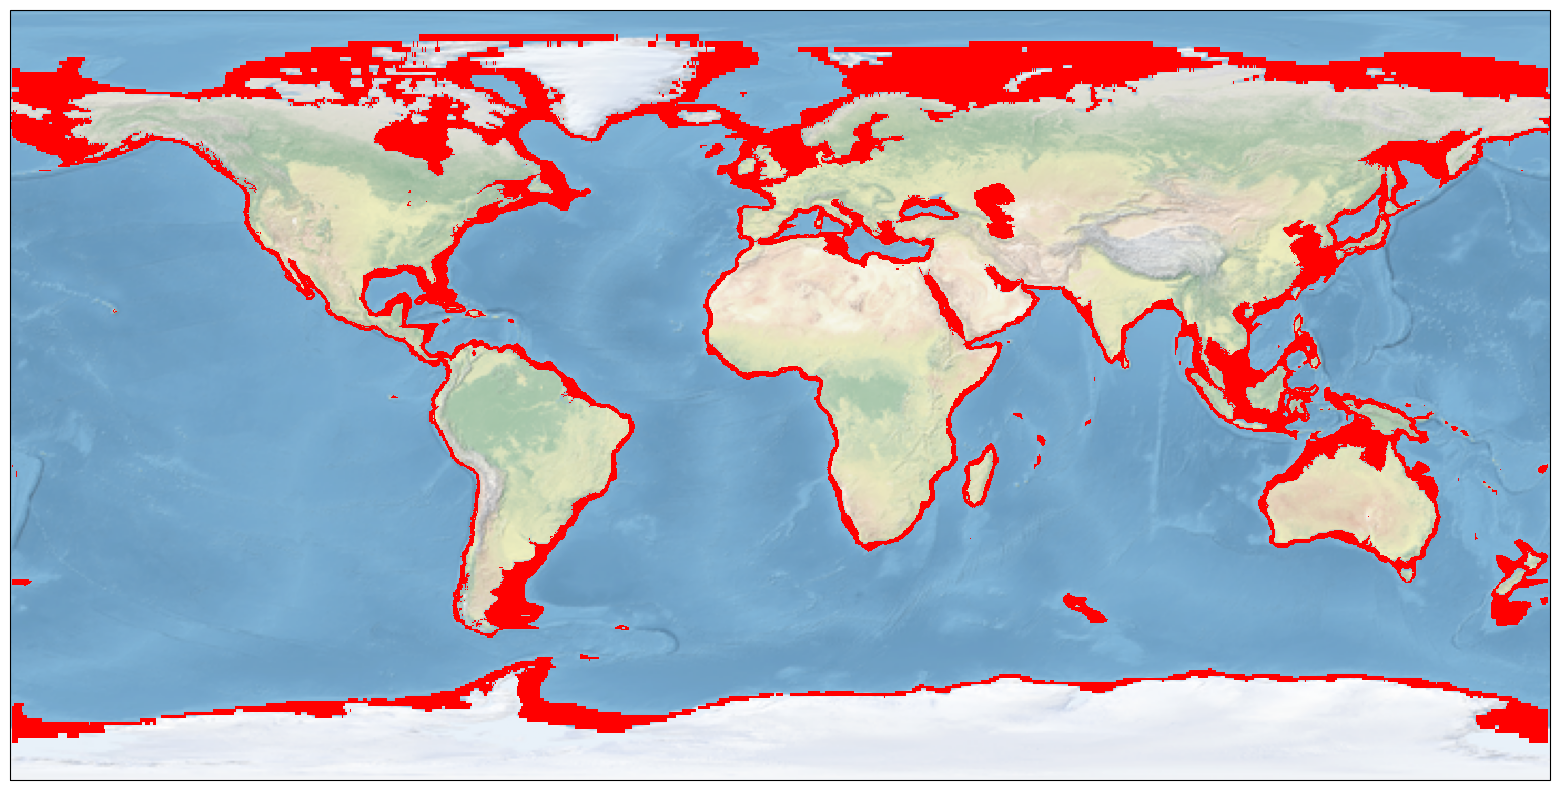

In [53]:
colors=['r']
plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ds_coast.mask.astype(float).plot(alpha=ds_coast.mask.astype(float),
                                 cmap=mpl.colors.ListedColormap(colors),add_colorbar=False)
#ax.coastlines()

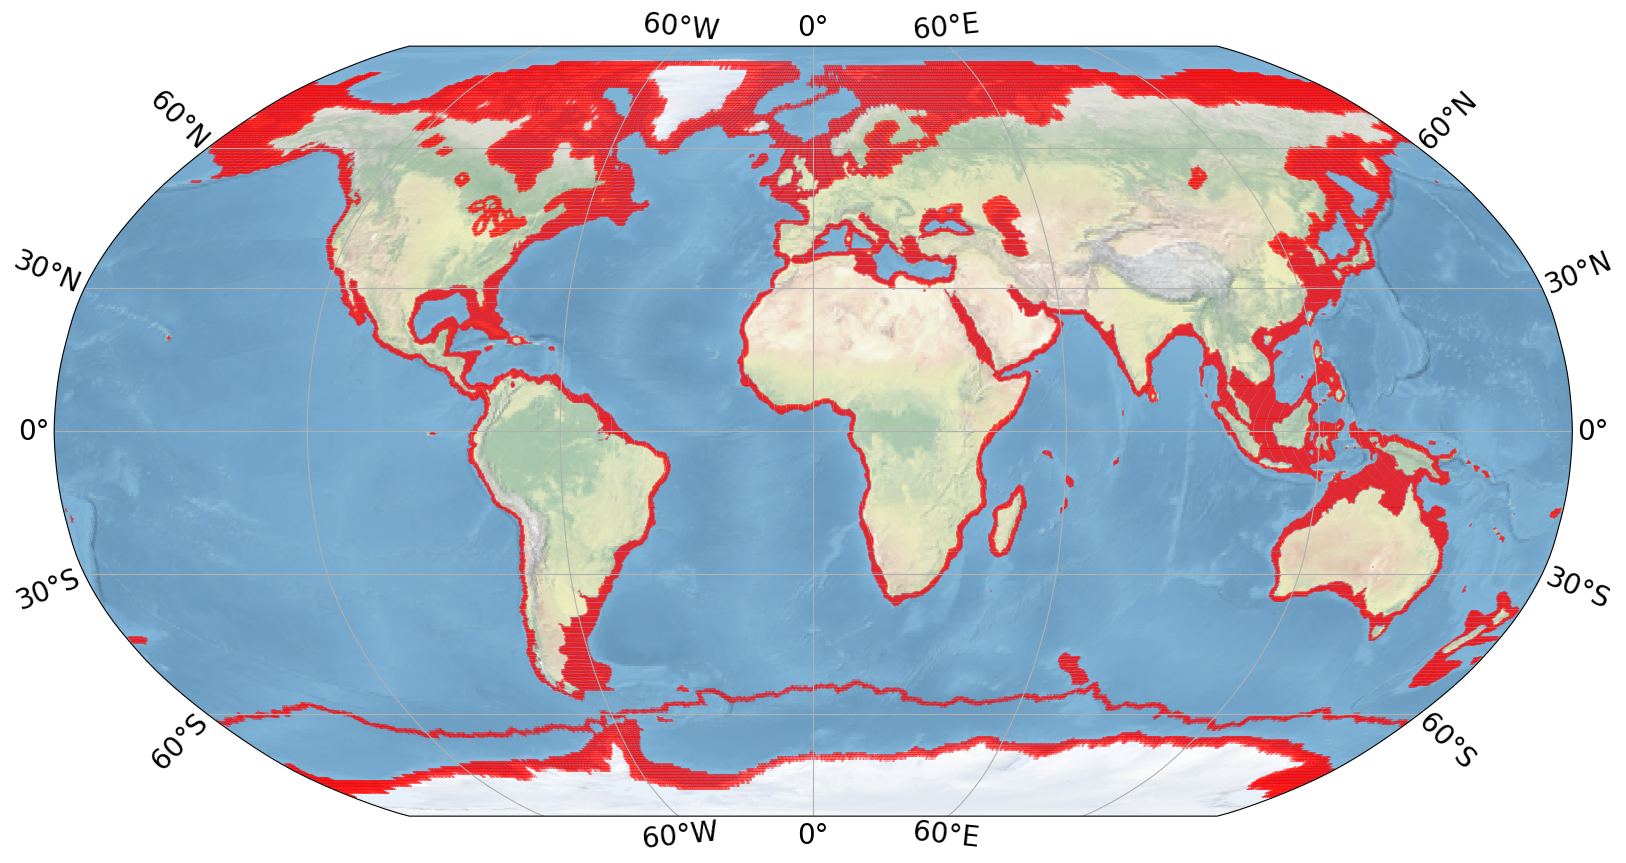

In [81]:
colors=['r']
plt.figure(figsize=(30, 10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0, globe=None))

combined_mask.astype(float).plot(alpha=sp.ndimage.binary_closing(combined_mask).astype(float) * 0.3,
                                 cmap=mpl.colors.ListedColormap(colors),add_colorbar=False,
                                transform=ccrs.PlateCarree())
ax.stock_img()
gl=ax.gridlines(draw_labels=True)


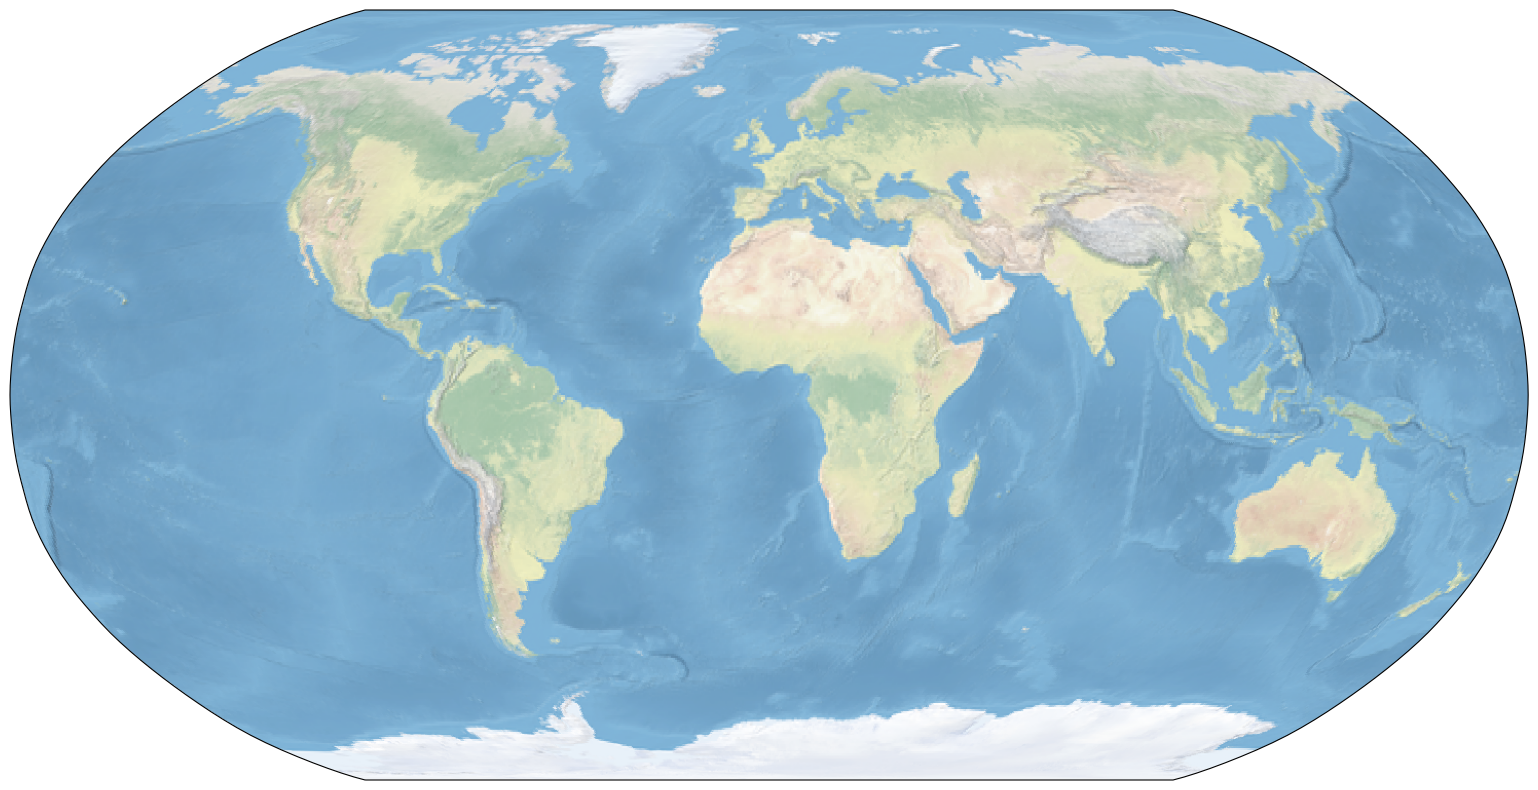

In [78]:
plt.figure(figsize=(30, 10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0, globe=None))
a = ax.stock_img()

In [79]:
a